In [35]:
%matplotlib inline
import numpy as np
import pandas as pd
import time
#from matplotlib import pyplot as plt
from matplotlib import pylab as plt
from IPython import display
from sklearn import model_selection,preprocessing
from grafica import *
from ClassNeuronaGral import NeuronaGradiente

In [36]:
datos = pd.read_csv("../../Datos/Semillas.csv")
datos.head()

,Area,Perimetro,Compacidad,LongNucleo,AnchoNucleo,Asimetria,LongSurco,Clase
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,Tipo1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,Tipo1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,Tipo1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,Tipo1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,Tipo1


In [37]:
datos["Clase"].unique()


array(['Tipo1', 'Tipo2', 'Tipo3'], dtype=object)

In [38]:
mapeo={
    "Clase":{"Tipo1":0, "Tipo2":1, "Tipo3":0}
}
datos.replace(mapeo,inplace=True)
datos.sample(15)

,Area,Perimetro,Compacidad,LongNucleo,AnchoNucleo,Asimetria,LongSurco,Clase
17,15.69,14.75,0.9058,5.527,3.514,1.599,5.046,0
124,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,1
16,13.99,13.83,0.9183,5.119,3.383,5.234,4.781,0
201,12.67,13.32,0.8977,4.984,3.135,2.300,4.745,0
138,15.60,15.11,0.8580,5.832,3.286,2.725,5.752,1
62,12.36,13.19,0.8923,5.076,3.042,3.220,4.605,0
84,19.51,16.71,0.8780,6.366,3.801,2.962,6.185,1
35,16.12,15.00,0.9000,5.709,3.485,2.270,5.443,0
65,12.88,13.50,0.8879,5.139,3.119,2.352,4.607,0
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,0


In [39]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Area         210 non-null    float64
 1   Perimetro    210 non-null    float64
 2   Compacidad   210 non-null    float64
 3   LongNucleo   210 non-null    float64
 4   AnchoNucleo  210 non-null    float64
 5   Asimetria    210 non-null    float64
 6   LongSurco    210 non-null    float64
 7   Clase        210 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 13.3 KB


In [40]:
X = np.array(datos.iloc[:,:-1])
T = np.array(datos['Clase'])

normalizador= preprocessing.MinMaxScaler()
#normalizador= preprocessing.StandardScaler() #media y desvío

# T = T.reshape(-1, 1)

X_train, X_test, T_train, T_test = model_selection.train_test_split(
        X, T, test_size=0.40)

X_train = normalizador.fit_transform(X_train)
X_test = normalizador.transform(X_test)

# T_train = normalizador.fit_transform(T_train)
# T_test = normalizador.transform(X_test)

print(T_train)

[1 0 0 0 0 0 1 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 1 0 1 1 0 0
 0 0 0 1 1 0 1 1 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0
 1 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 1 0 0 1 0 0 1 0 0 1
 1 0 1 1 0 0 0 0 1 0 1 0 0 0 1]


# De esta forma hay que normalizar. No es necesario normalizar a T porque siempre toma valores entre 0 y 1

In [41]:
func_act = "tanh"
if (func_act == 'tanh'):
    T_train = 2*T_train-1
    T_test  = 2*T_test-1
    
ppn = NeuronaGradiente(alpha=0.3, n_iter=200, cotaE=1e-03, FUN=func_act, draw=1, title=["X, T"])
ppn.fit(X_train, T_train)
#no grafica nada porque tenemos muchas variables, por lo cual nos estamos pasando de las 3 dimensiones

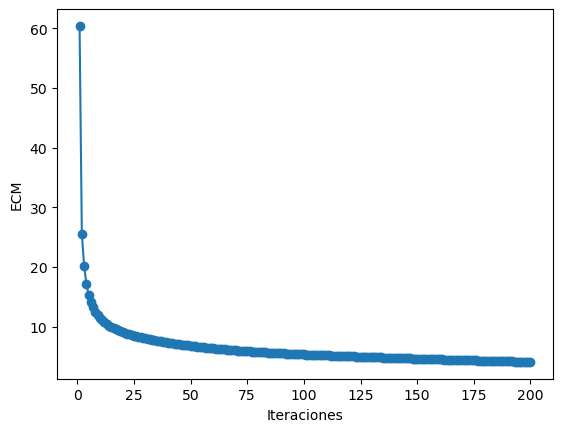

In [42]:
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Iteraciones')
plt.ylabel('ECM')
plt.show()

In [43]:
print("cantidad de iteraciones: ", len(ppn.errors_))

cantidad de iteraciones:  200


In [44]:
#del entrenamiento:
T_train = T_train.reshape(-1) 
suma_precisiones = 0

Y = ppn.predict(X_train)
#print("Y = ", Y)
#print("T = ", T_train)
aciertos = sum(Y == T_train)
#print("aciertos = ", aciertos)
precision = 100*aciertos/X_train.shape[0]
print("%% de aciertos = %.2f %%" % (precision))
suma_precisiones += precision
    
print(Y)
print(T_train)
#print(f"precision promedio de {precision}")

% de aciertos = 99.21 %
[ 1 -1 -1 -1 -1 -1  1 -1 -1  1  1 -1  1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1  1
 -1  1 -1 -1 -1  1  1  1 -1  1  1 -1 -1 -1 -1 -1  1  1 -1  1  1 -1  1  1
 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1 -1  1
 -1 -1  1 -1 -1  1 -1 -1 -1  1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1
 -1 -1  1  1  1  1 -1 -1  1 -1 -1  1 -1 -1  1  1 -1  1  1 -1 -1 -1 -1  1
 -1  1 -1 -1 -1  1]
[ 1 -1 -1 -1 -1 -1  1 -1 -1  1  1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1  1
 -1  1 -1 -1 -1  1  1  1 -1  1  1 -1 -1 -1 -1 -1  1  1 -1  1  1 -1  1  1
 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1 -1  1
 -1 -1  1 -1 -1  1 -1 -1 -1  1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1
 -1 -1  1  1  1  1 -1 -1  1 -1 -1  1 -1 -1  1  1 -1  1  1 -1 -1 -1 -1  1
 -1  1 -1 -1 -1  1]


In [45]:
#del testeo
#no debo repetir esta celda únicamente, debo repetir todo el entrenamiento del códgio para tener una nueva precisión

suma_precisiones = 0

Y = ppn.predict(X_test)
#print("Y = ", Y)
#print("T = ", T_test)
aciertos = sum(Y == T_test)
#print("aciertos = ", aciertos)
precision = 100*aciertos/X_test.shape[0]
print("%% de aciertos = %.2f %%" % (precision))
suma_precisiones += precision
    
print(Y)
print(T_test)
#print(f"precision promedio de {precision}")
    

% de aciertos = 97.62 %
[-1 -1 -1 -1 -1  1 -1 -1 -1  1  1  1  1 -1  1 -1  1  1 -1  1 -1 -1 -1 -1
 -1  1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1  1 -1  1  1  1 -1 -1  1 -1 -1  1
 -1 -1  1 -1 -1 -1 -1  1 -1 -1  1  1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1
 -1  1  1 -1  1  1  1 -1 -1 -1 -1  1]
[-1 -1 -1 -1 -1  1  1 -1  1  1  1  1  1 -1  1 -1  1  1 -1  1 -1 -1 -1 -1
 -1  1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1  1 -1  1  1  1 -1 -1  1 -1 -1  1
 -1 -1  1 -1 -1 -1 -1  1 -1 -1  1  1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1
 -1  1  1 -1  1  1  1 -1 -1 -1 -1  1]


# Tabla de resultados

|funcion|alfa|iteraciones|precisión train|precisión test
|---|---|---|---|---|
|sigmoid|0,3|200 |99.21 | 97.62|
|sigmoid|0,2|200 | 99.21| 97.62|
|sigmoid|0,1| 200| 99.21| 97.62| 
|tanh|0,3| 200| 99.21 | 96.43|
|tanh|0,2| 200| 98.41| 97.62 |
|tanh|0,1|200 | 99.21| 98.81|